# SIO 211A -- Homework 1

In [6]:
%matplotlib inline

In [18]:
# imports
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Init

In [15]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# (1) Leftward travelling wave ($k<0$)

## For our shallow water equations, we have for the wave height and water velocity:

## $\eta = \eta_0 \cos(kx - \omega t)$

## $u = u_0 \cos(kx - \omega t)$

## where $u_0 = gk\eta_0/\omega$ and the wave satisfies the dispersion relation:

## $\omega^2 = g H |k|^2$



## Setup

In [69]:
k = -1 # 1/m
A = 1. # wave amplitude, eta_0
g = 9.8 # m/s^2
H = 100. # m 
u = g*k*A/omega # wave velocity (m/s)

#
omega = np.sqrt(g*H) * np.abs(k)
omega # 1/s

31.304951684997057

## Define

In [64]:
def wave_height(x, t=0.):
    eta = A*np.cos(k*x - omega*t)
    return eta

In [65]:
def water_speed(x, t=0.):
    vel = u*np.cos(k*x - omega*t)
    return vel

## Consider $t=0$

### Wave Height

In [66]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
eta = wave_height(x)

### Water speed

In [67]:
x_arrows = np.pi* np.linspace(-2,0.,12) #np.array([-2*np.pi, -1.5*np.pi, -1*np.pi, -0.5*np.pi, 0.])
v_arrows = water_speed(x_arrows)
h_arrows = wave_height(x_arrows)

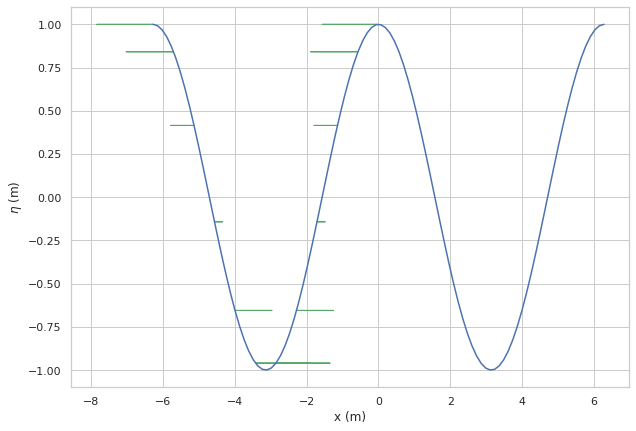

In [68]:
fig = plt.figure(figsize=(10,7))
ax = sns.lineplot(x=x, y=eta)
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$\eta$ (m)')
# Arrows
for xi, vi, hi in zip(x_arrows, v_arrows, h_arrows):
    plt.arrow(xi, hi, vi/2., 0., color='g')
    #print(xi,hi,vi)
plt.show()

## Examine the figure first at $x=0$, i.e. the central peak.  The water at the peak has the largest (negative) velocity implying water there will move out of that location.  This will reduce the wave height.

## Similarly, the water at $x=-\pi/2$ see a convergence of water and therefore a rise in height.  This means the peak at $x=0$ migrates to the left to $x=-\pi/2$ in 1/4 of a period.

## Regarding pressure gradient:

## $\frac{\partial p}{\partial x} = \rho_0 g \frac{\partial \eta}{\partial x}$

## At $t=0$ and $x=-\pi/2$, we have $\frac{\partial p}{\partial x} > 0$ and therefore $\frac{\partial \eta}{\partial x}$, i.e the amplitude will grow.

# (2) Energy

## Here is the energy equation derived in class:

## $\frac{\partial}{\partial t} \left [ \frac{H}{2} |\vec{u}|^2 + \frac{1}{2} g \eta^2 \right ] + \nabla \cdot (gH\eta \, \vec{u}) = 0$

## where the term in the [] is the Energy and the term in the () is the Energy flux.

## For linear non-rotating shallow water, the solution for $\vec{u}$ is:

## $u = u_0 \cos(kx - \omega t)$

## with $u_0 = gk\eta_0/\omega$

## and dispersion relation $\omega^2 = g H |k|^2$

## and height  $\eta = \eta_0 \cos(kx - \omega t)$


## Therefore, the Energy flux is (ignroing the $\cos^2$ which appears everywhere and can time averaged away):


## $gH\eta \vec{u} = g^2 H \eta_0^2 k / \omega = g \sqrt{gH} \eta_0^2$

## Now, recognize that

## $C_g = d\omega/dk = \sqrt{gH}$

## And because the Energy is equally partitioned between K.E. and P.E. (demonstrated in class), we have:

## $E = g \eta^2$

## Therefore, $C_g E = g \sqrt{gH} \eta_0^2$

## which equates with our Energy flux above!

----

# (3) Damping the waves

## Our momentum equations with damping become:

## $\frac{\partial u}{\partial t} = -g \frac{\partial \eta}{\partial x} - ru$

## $\frac{\partial v}{\partial t} = -g \frac{\partial \eta}{\partial y} - rv$


## If we multiply the first by $Hu$ and the second by $Hv$ and proceed as in lecture, then our Energy equation becomes:

## $\frac{\partial}{\partial t} \left [ \frac{H}{2} |\vec{u}|^2 + \frac{1}{2} g \eta^2 \right ] + \nabla \cdot (gH\eta \, \vec{u}) = -r H (u^2 + v^2)$

## Clear the term is always negative as $u^2$ and $v^2$ are positive definitive and also the constants that proceed them.

## This is akin to the spring equation, where the loss term is $- \epsilon m x_t^2$ 

----

# (4) Coriolis and shallow water

## Adding the Coriolis terms to the shallow water equations we have:

## $\frac{\partial u}{\partial t} = -g \frac{\partial \eta}{\partial x} + fv$

## $\frac{\partial v}{\partial t} = -g \frac{\partial \eta}{\partial y} - fu$

## Using our same approach, we see that the sign flip leads to a *cancellation* of the Coriolis terms, i.e. there is *no* change to the Energy equation.